# DSC 305 Lab 2: Wine Reviews





Muchiri Kahwai  
Lab Partner : Johnson Subedi  
DSC 305 S23 
Lab 2: Wine Reviews

## Import Libraries

Before starting this analysis, it is essential to import the relevant libraries. Pandas is a robust library that is widely used for data analysis and manipulation. It enables us to read data from a CSV file and store it in a Pandas DataFrame object. Numpy is a linear algebra library that offers extensive support for numerical computations. Additionally, to create data visualizations, we can use the powerful data visualization libraries such as Matplotlib and Seaborn.


In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry_convert as pc

**1. Use pandas to import the [Wine Reviews dataset](https://www.kaggle.com/zynicide/wine-reviews) from Kaggle.**

## Import the Dataset

Afterward, we proceed to import the CSV file into our program. For this purpose, we utilize the Pandas library to read and load the dataset into a DataFrame data structure.

In [73]:
df = pd.read_csv('winemag-data-130k-v2.csv')

**2. Note that some fields (columns) have missing data. List, in order, the 3 fields with the most missing data (as a percentage of total data).** 

In [74]:
i_missing_percentages = df.isna().mean() * 100

# Sorting the columns in descending order
i_sorted_missing_percentages = i_missing_percentages.sort_values(ascending=False)

# Selecting top 3 columns with the highest percentage of missing values
df_top_3_missing = i_sorted_missing_percentages[:3]

print(df_top_3_missing.to_string())

region_2                 61.136715
designation              28.825661
taster_twitter_handle    24.015357


By computing the percentage of missing values for each column and sorting them in descending order, we were able to determine the 3 fields with the highest proportion of missing data. This analysis is crucial for understanding the quality and completeness of the dataset and can inform decisions on how to handle missing data. 

**Observations**

Region_2 has a bigger percentage of missing values. Looking back at its description in the dataset, it is described as "Sometimes there are more specific regions specified within a wine growing area". This means that the column sometimes provides additional details about more specific regions within a wine growing area. While this information can be helpful in clarifying the geographic location of the wine, it does not necessarily contain key information for our analysis and may be considered a supplementary or clarifying feature rather than a critical one.

**3. Is *price* missing for any record (row)? What abour *points*?**

In [75]:
# To find whether price and points is missing for any record

b_missing_price = df['price'].isnull().any()
b_missing_points = df['points'].isnull().any()

print(f"Is price missing for any record? {b_missing_price}")
print(f"Is points missing for any record? {b_missing_points}")


## To figure out the number of number of rows where price and points are missing

df = df.replace('', pd.NaT, regex=True)

c_price = df['price']
c_points = df['points']

missing_price = df['price'].isna().sum()
missing_points = df['points'].isna().sum()

print("Number of rows missing price:" + str(missing_price))
print("Number of rows missing points:" + str(missing_points))


# Get the number of rows in the dataset
i_num_rows = df.shape[0]
i_percentage_of_missing_price = (missing_price / i_num_rows) * 100
print("The percentage of rows that have a missing price is:" + str(i_percentage_of_missing_price))



Is price missing for any record? True
Is points missing for any record? False
Number of rows missing price:8996
Number of rows missing points:0
The percentage of rows that have a missing price is:6.921544036746659


**Observations** 

There are no missing values for points but there are 8996 rows that have missing values for price.This means that 6.9% of rows have a missing value of price. This information by itself is not enough to determine whether or not this value is significant. It may be considered signicant if the missing values are disproportionately distributed across important variables or if the missing data occurs systematically in a way that affects the validity of the analysis.However, at this point we do not have that information. We will need to explore the data further. 

**4. List all the values that occur in the country column, along with the number of rows that corresponds to each country. Sort the resulting aggregated dataset in order of decreasing number.**

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Macedoni

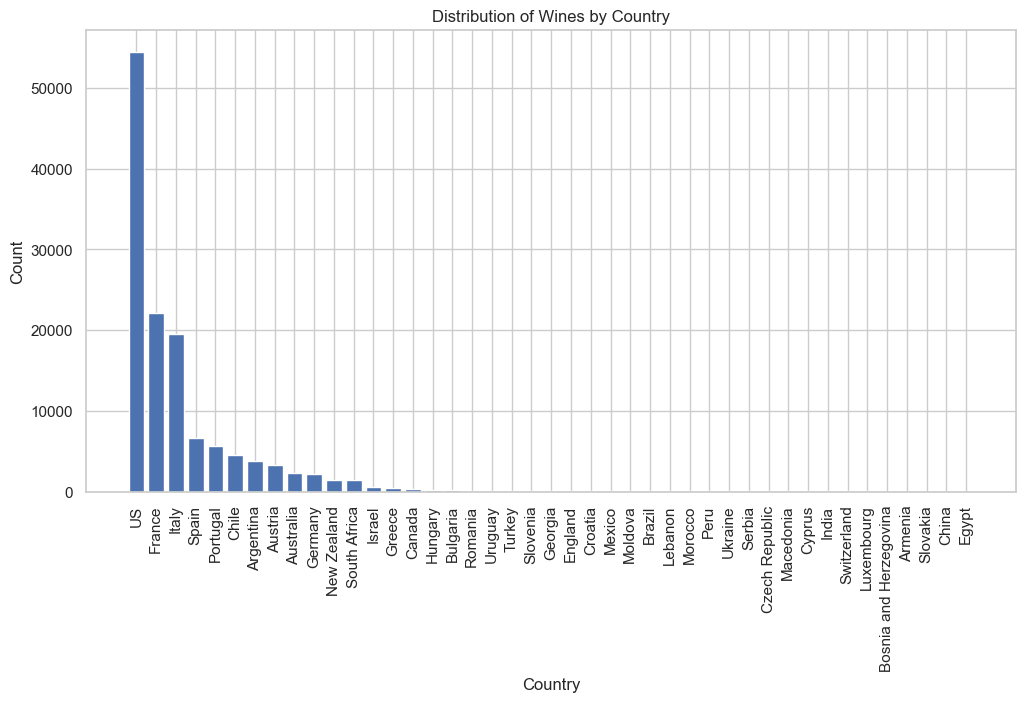

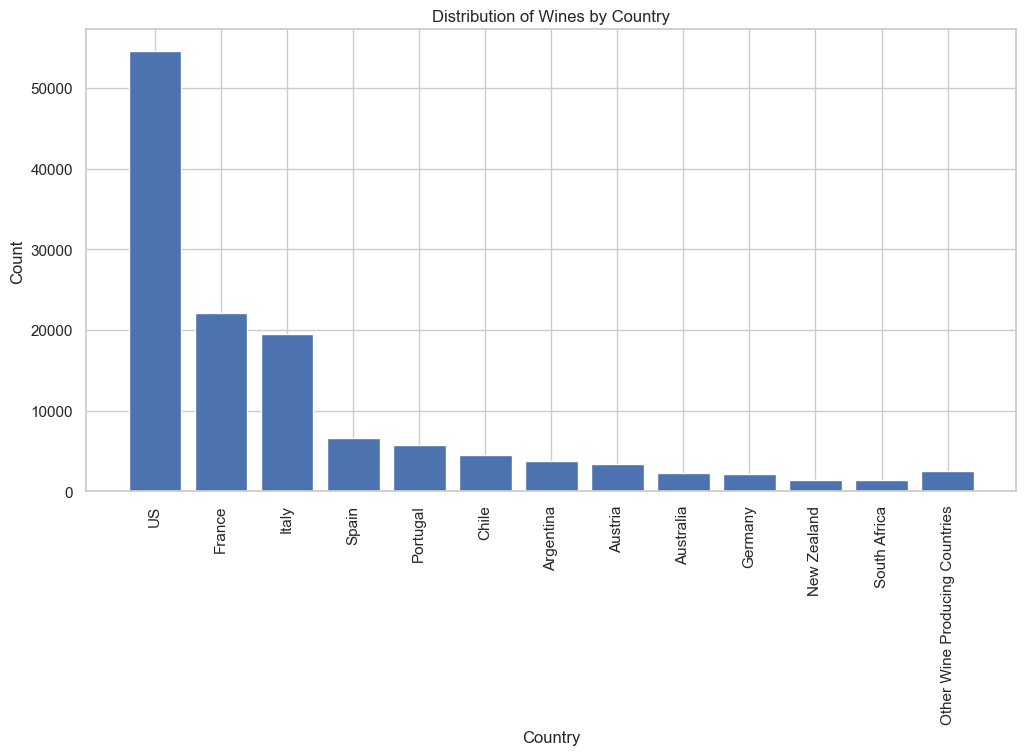

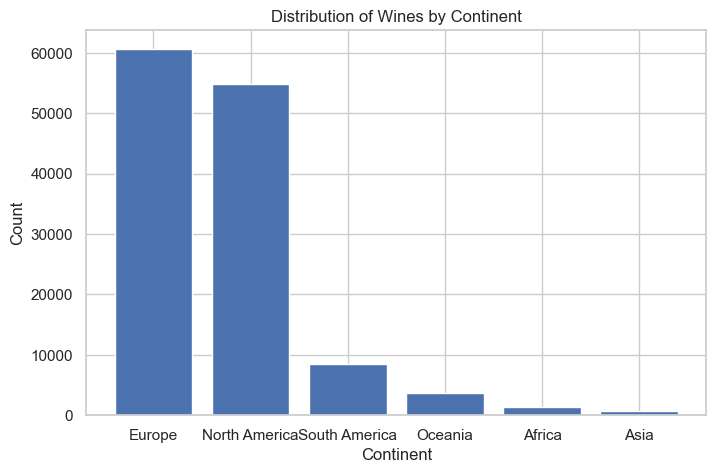

In [76]:
# Counting number of rows for each country and sorting in descending order
df_country_counts = df['country'].value_counts().sort_values(ascending=False)

# Converting the Series to a string and splitting it into lines
output_lines = df_country_counts.to_string().splitlines()

for line in output_lines:
    print(line)
    

#To check if the top 3 countries produces more than the other countries combined

us_rows = df[df['country'] == 'US'].shape[0]
france_rows = df[df['country'] == 'France'].shape[0]
italy_rows = df[df['country'] == 'Italy'].shape[0]
total_rows = df.shape[0]
if us_rows + france_rows + italy_rows > total_rows / 2:
    print("The USA, France, and Italy produce more wine than all other countries combined.")
else:
    print("All other countries combined produce more wine than the USA, France, and Italy.")
    

country_counts = df['country'].value_counts()

# Create a bar chart of the country counts
plt.figure(figsize=(12,6))
plt.bar(country_counts.index, country_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Wines by Country')
plt.show()



# Set a threshold for countries to be included in the "Other" category
threshold = 1000

# Create a new category for countries with counts less than the threshold
other_count = country_counts[country_counts < threshold].sum()
country_counts = country_counts[country_counts >= threshold]
country_counts['Other Wine Producing Countries'] = other_count

# Create a bar chart of the country counts
plt.figure(figsize=(12,6))
plt.bar(country_counts.index, country_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Wines by Country')
plt.show()



# Creating a bar chart for continents
# Creating a dictionary.
country_to_continent = {
    'US': 'North America',
    'France': 'Europe',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Portugal': 'Europe',
    'Chile': 'South America',
    'Argentina': 'South America',
    'Austria': 'Europe',
    'Australia': 'Oceania',
    'Germany': 'Europe',
    'New Zealand': 'Oceania',
    'South Africa': 'Africa',
    'Israel': 'Asia',
    'Greece': 'Europe',
    'Canada': 'North America',
    'Hungary': 'Europe',
    'Bulgaria': 'Europe',
    'Romania': 'Europe',
    'Uruguay': 'South America',
    'Turkey': 'Asia',
    'Slovenia': 'Europe',
    'Georgia': 'Asia',
    'England': 'Europe',
    'Croatia': 'Europe',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Brazil': 'South America',
    'Lebanon': 'Asia',
    'Morocco': 'Africa',
    'Peru': 'South America',
    'Ukraine': 'Europe',
    'Macedonia': 'Europe',
    'Czech Republic': 'Europe',
    'Serbia': 'Europe',
    'Cyprus': 'Asia',
    'India': 'Asia',
    'Switzerland': 'Europe',
    'Luxembourg': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Armenia': 'Asia',
    'Slovakia': 'Europe',
    'China': 'Asia',
    'Egypt': 'Africa'
}

# Map each country to its corresponding continent
df['continent'] = df['country'].map(country_to_continent)

# Group the countries by continent and count the number of rows
continent_counts = df['continent'].value_counts()

# Create a bar chart of the continent counts
plt.figure(figsize=(8,5))
plt.bar(continent_counts.index, continent_counts.values)
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('Distribution of Wines by Continent')
plt.show()

**Observations**

1. The United States has the highest representation in the dataset, with over 54,000 rows corresponding to US wines. France and Italy follow closely behind, with over 22,000 and 19,000 rows respectively. 
2. The USA, France, and Italy have more rows corresponding to wines from their countries than all other countries combined.
3. The dataset contains wines from a diverse set of countries, ranging from well-known wine producers like France, Italy, and Spain, to less well-known producers like Armenia, Egypt, and China.
4. Some countries have relatively few rows in the dataset, with some having only a single row. This can make it difficult to draw meaningful conclusions about wines from those countries.
5. Even when we combine the production from countries not meeting a specific threshold, the top 8 countries in terms of wine production continue to hold a significant advantage over all the other countries that failed to meet the production threshold. This indicates that the top 8 countries have a dominant position in the wine production industry, while the remaining countries exhibit relatively lower levels of wine production.
6.  When we plotted according to continents, Europe and North America have almost similar number of rows and their counterparts fall way behind. We wonder how the North America stastics is distrubted given the fact that we know USA has the biggest representation. 


**5. Are any wines associated with province Kentucky in the USA? List the wineries with province Kentucky. Separately, list all the varieties grown in Kentucky.** *(If you cannot locate any wines produced in Kentucky, then choose Idaho for this question instead.)*

In [77]:
kentucky_wines = df[(df['province'] == 'Kentucky') & (df['country'] == 'US')]

# Print the wineries with province Kentucky
if len(kentucky_wines) > 0:
    print("Wineries in Kentucky:")
    for winery in kentucky_wines['winery'].unique():
        print(winery)
else:
    print("No wines associated with province Kentucky in the USA")
    
    
if len(kentucky_wines) > 0:
    kentucky_varieties = kentucky_wines['variety'].unique()
    print("Varieties grown in Kentucky:")
    for variety in kentucky_varieties:
        print(variety)
else:
    print("No wines associated with province Kentucky in the USA")    


Wineries in Kentucky:
Elk Creek Vineyards
Varieties grown in Kentucky:
Cabernet Franc



**Observations** 

It is interesting that despite the fact that the United States has such a huge representation, there was only one winery in Kentucky and one variety in Kentucky. However, one further look it makes sense because the USA is a huge country with 50 states. 

**6. Can you identify any other problems involving the data set, such as duplicate entries or irrelevant columns (features)?  Clean the dataset by addressing each issue that you discover.**

In [78]:
#Remove irrelevant Columns
df = df.drop(["Unnamed: 0"], axis=1)
df.head()



,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,continent
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Europe
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Europe
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,North America
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,North America
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,North America


In [79]:
duplicates = df.duplicated()
df = df.drop_duplicates()

**Observations**

We decided to drop the column named Unnamed : 0 this is because if we drop the region_2 column which has the highest percentage of missing data, we lose 60% of data. If we drop taster_twitter_handle or taster_name we lose 20% of our data. Those are significant amounts of our data and we do not want to lose that amount of data. 

**7. Are there any wines that are not exact duplicates, but nevertheless have exactly the same description? If so, is there an apparent explanation for this? For example, maybe it is the same wine?**

In [80]:
duplicates = df[df.duplicated(['description'], keep = False)]
sorted_different = duplicates.sort_values(by='description')
sorted_different.shape



(66, 14)

**Observations**

It is evident from the data that wine reviewers have different regions, titles, and designations. It is possible that this could be due to the reviewers trying different wines in different regions. However, we cannot draw any definitive conclusions or identify any patterns in the dataset that explain why there are identical descriptions for two different wines.

**8. What is the highest price for any wine? How many different wines have that price (there could be ties)? Give the designation of at least one wine with highest price, along with the vineyard and variety.** 

In [81]:
# Find the highest price for any wine
highest_price = df['price'].max()

# Count the number of different wines that have that price
num_wines = df[df['price'] == highest_price]['title'].nunique()

# Show the designation, vineyard, and variety of at least one wine with the highest price
wine = df[df['price'] == highest_price].iloc[0]
designation = wine['designation']
vineyard = wine['winery']
variety = wine['variety']

# Print the results
print(f"The highest price for any wine is ${highest_price}.")
print(f"There are {num_wines} different wines that have that price.")
print(f"At least one wine with the highest price is '{wine['title']}' by {vineyard} from {designation}, {variety}.")



top_5_prices = df['price'].nlargest(5)

# Count the number of different wines that have each of those prices
num_wines = df[df['price'].isin(top_5_prices)]['title'].nunique()

# Find the countries where the top 5 prices wines are produced
countries = df[df['price'].isin(top_5_prices)].groupby(['country', 'price']).size().reset_index().rename(columns={0:'count'})
top_5_countries = countries[countries['price'].isin(top_5_prices)]['country'].unique()

# Print the results
print(f"The top 5 highest prices for any wine are: {list(top_5_prices)}")
print(f"There are {num_wines} different wines that have those prices.")
print(f"The top 5 prices wines are produced in: {', '.join(list(top_5_countries))}.")

The highest price for any wine is $3300.0.
There are 1 different wines that have that price.
At least one wine with the highest price is 'Château les Ormes Sorbet 2013  Médoc' by Château les Ormes Sorbet from nan, Bordeaux-style Red Blend.
The top 5 highest prices for any wine are: [3300.0, 2500.0, 2500.0, 2013.0, 2000.0]
There are 6 different wines that have those prices.
The top 5 prices wines are produced in: France, US.



**Observations**

There highest price for any wine is $3300 and only one type of wine costs that much. It is from the Château les Ormes Sorbet but no designation is given for it. In this dataset, France has the second most number of occurances. Therefore having a higher probability of being home to the wine with the highest price. On further inspection, we can see that the top 5 most expensive wines come from 2 the two countries with the highest number of representation: USA and France. 

**9. List all countries along with the average price and the average points of all wines associated with that country.  Sort the list by price and (in case there are ties), next by points, and finally alphabetically by country name.** 

                            price     points
country                                     
Switzerland             72.833333  88.500000
England                 52.677966  91.746032
Germany                 43.460789  89.895582
Hungary                 42.234375  89.294574
France                  41.994105  88.866752
Italy                   39.928286  88.576198
US                      36.697520  88.555384
Canada                  35.776786  89.309735
Australia               35.686491  88.561220
Israel                  31.770419  88.454936
Austria                 31.336751  90.129532
Lebanon                 30.281250  87.593750
Spain                   28.205654  87.235612
New Zealand             26.833065  88.299687
Portugal                26.554198  88.263128
Mexico                  26.470588  85.161765
Uruguay                 26.326531  86.663265
Slovenia                25.542857  88.129870
Croatia                 25.529412  87.185714
Turkey                  24.950617  88.074074
Serbia    

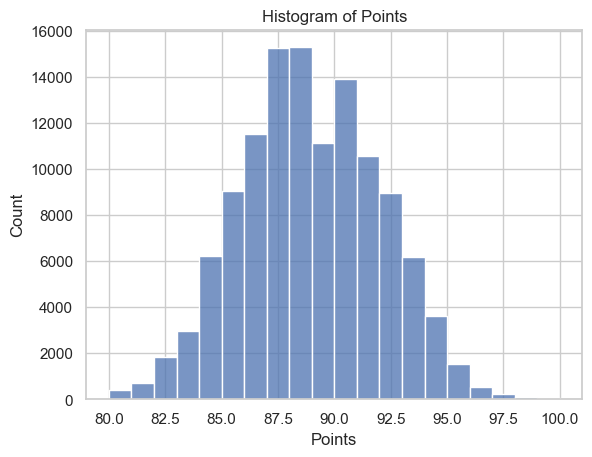

In [82]:
# Group the data by country and calculate the mean of price and points
country_stats = df.groupby(['country']).agg({'price': 'mean', 'points': 'mean'})
country_stats = country_stats.sort_values(['price', 'points', 'country'], ascending=[False, False, True])
print(country_stats)

average_price = country_stats['price'].mean()
print('Average price:', average_price)


average_points = country_stats['points'].mean()
print('Average points:', average_points)


# Create a histogram of the points column
sns.histplot(data=df, x='points', kde=False, bins=20)

# Set the x-label and title of the plot
plt.xlabel('Points')
plt.title('Histogram of Points')

# Show the plot
plt.show()




**Observations**

1. The highest average wine price was 72.83 and it was in Switzerland while The lowest average wine price was 9.21 in Ukraine.
2. The highest rating is 91.746032 points which is from  England, indicating that wines from England are well-received in the reviews. The lowest rating was 83.56 in Peru. 
3. Countries like India, Armenia and Bulgaria have very low average prices despite the fact that they high ratings suggesting that they may offer good value for money.
4. A higher rating does not necessarily mean a higher price. Infact there are a good number of countries that despite the fact that the wine from their country has higher rating, they are sold at lower prices. 
5. The top 5 countries with the highest wine price are all from Western Europe while 4 of the bottom 5 countries are in Eastern Europe. 
6. The average of the average wine prices is 26.46. However, we have countries like Switzerland and England with very high prices that are more than double the average. 
7. The average of the average points is 87.63 and many of the points cluster around that figure. 


**10. List all of the states (province) that occur in the US that occur in the dataset. List the states in alphabetical order. For each state, list the following statistics for points and price: number of rows for that state that have a value (sample size $N$), minimum value, maximum value, mean (average), median, standard deviation.** 



In [83]:
# create a new dataframe for US states only
us_states = df[df['country'] == 'US']['province']

# group the dataframe by state and calculate the desired statistics
state_stats = df[df['country'] == 'US'].groupby('province').agg({'points': ['count', 'min', 'max', 'mean', 'median', 'std'], 'price': ['count', 'min', 'max', 'mean', 'median', 'std']})

# display the results in a formatted table
formatted_table = pd.concat([state_stats], keys=['Statistics'])
formatted_table.index.names = ['State', 'Stat']
formatted_table.columns = pd.MultiIndex.from_tuples([(col[0].capitalize(), col[1].capitalize()) for col in formatted_table.columns])
formatted_table


Points                                       \
                              Count Min  Max       Mean Median       Std   
State      Stat                                                            
Statistics America               84  80   94  86.357143   86.0  2.418019   
           Arizona               39  82   88  84.948718   85.0  1.503482   
           California         33656  80  100  88.618047   89.0  3.306827   
           Colorado              62  80   91  86.032258   86.0  1.966671   
           Connecticut            3  84   84  84.000000   84.0  0.000000   
           Hawaii                 1  87   87  87.000000   87.0       NaN   
           Idaho                179  80   91  86.469274   87.0  2.086044   
           Illinois               5  83   86  84.400000   84.0  1.140175   
           Iowa                   4  81   84  83.000000   83.5  1.414214   
           Kentucky               1  83   83  83.000000   83.0       NaN   
           Massachusetts          6  83   89  84.833333   84.5  2.228602   
           Michigan             105  82   91  86.095238   86.0  1.958825   
           Missouri              33  80   86  83.333333   83.0  1.726026   
           Nevada                 3  83   85  84.000000   84.0  1.000000   
           New Jersey             8  82   87  84.000000   83.0  1.927248   
           New Mexico            44  81   88  83.909091   84.0  1.443803   
           New York            2456  80   94  87.120114   87.0  2.284952   
           North Carolina        22  81   90  84.545455   84.5  2.197992   
           Ohio                  10  80   87  83.900000   84.0  1.852926   
           Oregon              4929  80   99  89.053155   89.0  2.851082   
           Pennsylvania          17  80   91  84.529412   85.0  2.348341   
           Rhode Island           1  90   90  90.000000   90.0       NaN   
           Texas                 90  80   89  85.155556   85.0  2.016288   
           Vermont                2  84   85  84.500000   84.5  0.707107   
           Virginia             725  80   92  85.565517   86.0  2.120063   
           Washington          7965  80  100  88.966353   89.0  2.698638   
           Washington-Oregon      7  88   90  88.428571   88.0  0.786796   

                              Price                                             
                              Count   Min     Max       Mean Median        Std  
State      Stat                                                                 
Statistics America               84   6.0    75.0  20.321429   17.0  12.111093  
           Arizona               38  11.0    54.0  29.052632   29.0  11.330293  
           California         33526   4.0  2013.0  39.171658   33.0  30.761174  
           Colorado              62  12.0   100.0  33.774194   30.0  17.063449  
           Connecticut            3  11.0    20.0  15.333333   15.0   4.509250  
           Hawaii                 1  28.0    28.0  28.000000   28.0        NaN  
           Idaho                177   6.0    55.0  20.468927   18.0   9.147180  
           Illinois               5  26.0    40.0  32.400000   32.0   4.979960  
           Iowa                   4  13.0    20.0  15.500000   14.5   3.316625  
           Kentucky               1  35.0    35.0  35.000000   35.0        NaN  
           Massachusetts          6  15.0    36.0  22.333333   21.0   8.041559  
           Michigan             103  13.0   250.0  32.495146   25.0  27.715952  
           Missouri              33   7.0    40.0  17.333333   15.0   9.339656  
           Nevada                 3  22.0    75.0  43.000000   32.0  28.160256  
           New Jersey             8  13.0    36.0  25.500000   25.0   9.365591  
           New Mexico            44  10.0    38.0  22.704545   20.5   7.620595  
           New York            2444   7.0   125.0  22.785188   20.0  10.765088  
           North Carolina        22  10.0    50.0  20.954545   18.0   8.403385  
           Ohio                  10  11.0    17

**Observations** 

1.  There is a state called America, which definitely shows that there was an error in collecting and assigning this dataset. 
2.   California, Oregon, and Washington have a large number of rows and high means for both points and price, indicating that they are major wine-producing regions in the US.
3.  We observe that the minimum and maximum values for both points and price exhibit significant variations among the different states, suggesting that the quality and price of wine can differ substantially depending on the location where it is produced.
4. Hawaii, Kentucky, and Rhode Island, have very small sample sizes and limited information, which may not provide meaningful insights.
5. Oregon has the highest standard deviation for price, indicating a wider price range.
6. The highest mean price being in California and the highest mean points being in Rhode Island.
7. The variability in the standard deviation of points and price across different states indicates that the distribution of wines is not consistent.


**11. Use Matplotlib or Seaborn to construct a scatter plot of the price of Argentine wines and the points assigned to each wine in the review.** 



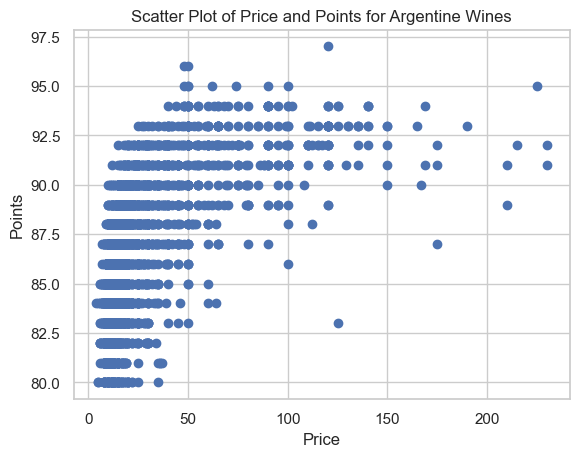

In [84]:
# Filter the data for Argentine wines only
argentina_df = df[df['country'] == 'Argentina']

# Create a scatter plot of price and points for Argentine wines
plt.scatter(argentina_df['price'], argentina_df['points'])

# Set the axis labels and title
plt.xlabel('Price')
plt.ylabel('Points')
plt.title('Scatter Plot of Price and Points for Argentine Wines')

# Show the plot
plt.show()

**Observation**

It is evident that as the price of Argentine wines increases, the points assigned to each wine also increase, indicating a positive correlation between the two variables. This observation suggests that there may be a relationship between the price of a wine and its quality. However, there are also many wines with lower prices that receive high point scores, implying that price is not the only determinant of the quality of Argentine wines.

**12. Construct an effective data visualization showing the relative contribution of the reviewers ("tasters"). The chart should show the individual contribution of the top nine reviewers, with all other reviewers aggregated as Other.**



C:\Users\kahwa\AppData\Local\Temp\ipykernel_38952\3479203500.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tasters = top_tasters.append(pd.Series({'Other': other_tasters_sum}))


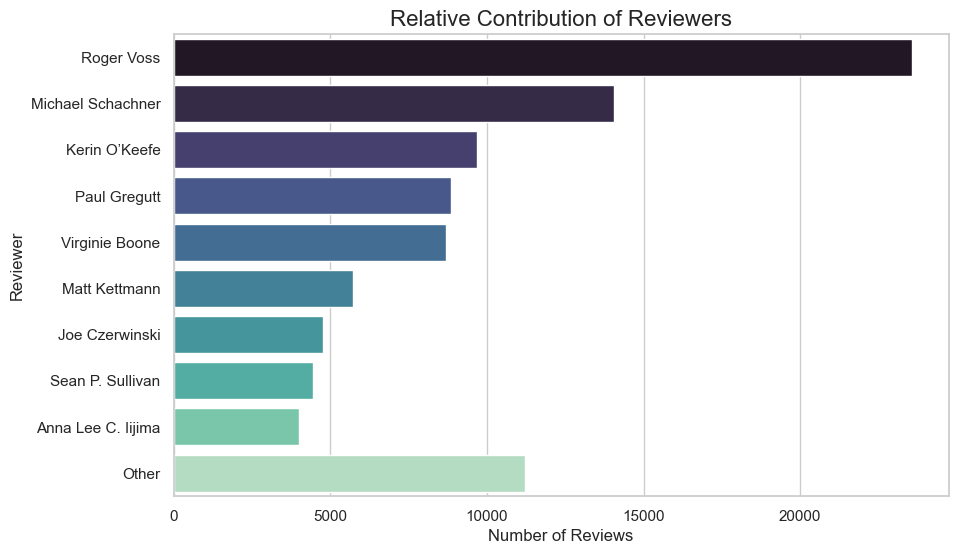

In [85]:
taster_counts = df['taster_name'].value_counts()

# Get the top nine tasters
top_tasters = taster_counts[:9]

# Calculate the sum of reviews for all other tasters
other_tasters_sum = taster_counts[9:].sum()

# Create a new Series including the top nine tasters and the Other category
tasters = top_tasters.append(pd.Series({'Other': other_tasters_sum}))

# Create a horizontal bar chart
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=tasters.values, y=tasters.index, palette='mako')
ax.set_title('Relative Contribution of Reviewers', fontsize=16)
ax.set_xlabel('Number of Reviews', fontsize=12)
ax.set_ylabel('Reviewer', fontsize=12)
plt.show()

**Observations** 

We can see that the top contributor, Roger Voss, has reviewed almost twice as many wines as the second top contributor, Michael Schachner. The top nine contributors combined reviewed over 50% of all wines, indicating a relatively small number of reviewers account for a significant portion of the reviews.We can also see that the other seven top reviewers contribute significantly fewer reviews than the top reviewer , with a relatively small difference between them. 

 **13. Discussion. Suppose you wanted to build a predictive model to predict the *variety* and *points* assigned to the wine based only on the words in the *description*. Briefly describe how you would go about this using knowledge that you already have from DSC 205 or other courses.** 



1. We would need to prepare the text data by cleaning and preprocessing it. This would involve removing any unwanted characters, stop words, punctuation to normalize it.
2. Secondly, we would need to use semantic embeddings to represent the text data in a numerical format that can be fed into a machine learning model. Word embedding techniques can be used to generate high-dimensional vectors that capture the meaning of words in the text.
3. We can then use these embeddings to train a recommender system to predict the variety and points assigned to the wine. There are various machine learning models that can be used for this, such as neural networks, support vector machines, or decision trees.
4. We would evaluate the performance of the model using metrics such as accuracy, precision, recall, and F1-score, and make adjustments as necessary to improve the performance.

## Conclusion

In this project, here is a summary of what I did: 

1. Data Cleaning : I performed data cleaning operations such as eliminating missing values, resolving inconsistencies in the dataset, and eliminating duplicate entries.
2. Explorataory Data Analysis : I proceeded to perform exploratory data analysis to gather insights about the dataset after cleaning it. This involved visualizing the distribution of prices and points, recognizing the countries with the highest average prices and points, and identifying the most popular wine varieties.
3. Data Visualization : I generated various data visualizations such as scatter plots, and  bar charts to effectively convey the findings obtained from the data analysis.
4. Predactive modelling : To conclude, I also discussed the possibility of building a predictive model that utilizes the words in the wine description to predict the variety and points assigned to the wine. This would involve utilizing knowledge about recommender systems and semantic embeddings

I also learned that I conclude the following : 

1. The distribution of points and price data in the dataset is right-skewed, indicating that there are more low-priced and low-scoring wines than high-priced and high-scoring ones.
2. The average price of wines in the dataset is higher than the median price, indicating the presence of some high-priced outliers.
3. The dataset shows that wine quality is not solely determined by price, as there are many wines with lower prices that still receive high point scores.
4. There is a positive correlation between the price of wines and the points assigned to them, indicating that higher-priced wines tend to receive higher point scores.

## Acknowlegements

I would like to express my gratitude to my lab partner Johnson. He and I collaborated extensively, discussing the optimal approach for various scenarios and assisting each other in problem-solving. Our teamwork allowed us to gain a deeper understanding of the dataset and explore it more thoroughly. I would also like to thank Dr. Zhang for answering our questions during office hours and lab hours. The suggestions and insights provided were of immense value and this project would not have been accomplished without their contribution.

## References

1. Matplotlib. (n.d.). Retrieved from https://matplotlib.org/

2. NumPy. (n.d.). Retrieved from https://numpy.org/

3. Pandas. (n.d.). Retrieved from https://pandas.pydata.org/

4. Python Software Foundation. (n.d.). Python Language Reference. Retrieved from https://docs.python.org/3/reference/

5. Scikit-learn. (n.d.). Retrieved from https://scikit-learn.org/stable/

6. Seaborn. (n.d.). Retrieved from https://seaborn.pydata.org/

7. TfidfVectorizer. (n.d.). Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
    
8. OpenAI.“GPT-3.” Accessed February 27, 2023. https://openai.com/gpt3/.    